In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("Iris.csv")
df = df.drop(columns=["Id"])

# Extract features (first 4 columns) and target (last column)
X = df.iloc[:, :-1].values   # All columns except last (4 feature columns)
y = df.iloc[:, -1].values    # Last column (Species)


In [15]:
import numpy as np
label_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

# Convert labels to numeric, handling both string and numeric inputs
y = np.array([label_map[str(label)] if str(label) in label_map else int(label) for label in y])


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
input_size = 4
hidden_size = 5
output_size = 3

learning_rate = 0.1
epochs = 1000


In [20]:
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [21]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)


(4, 5) (1, 5)
(5, 3) (1, 3)


In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(a):
    return a * (1 - a)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [23]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-9  # avoid log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))


In [24]:
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


In [25]:
def backward_pass(X, Y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2

    m = X.shape[0]

    # Output layer delta
    dZ2 = A2 - Y

    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer delta
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)

    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Gradient descent update
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


In [26]:
losses = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_pass(X_train)
    loss = cross_entropy_loss(y_train, A2)
    losses.append(loss)

    backward_pass(X_train, y_train, Z1, A1, Z2, A2)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0988
Epoch 100, Loss: 1.0908
Epoch 200, Loss: 0.8483
Epoch 300, Loss: 0.5513
Epoch 400, Loss: 0.4541
Epoch 500, Loss: 0.3981
Epoch 600, Loss: 0.3530
Epoch 700, Loss: 0.3128
Epoch 800, Loss: 0.2766
Epoch 900, Loss: 0.2445


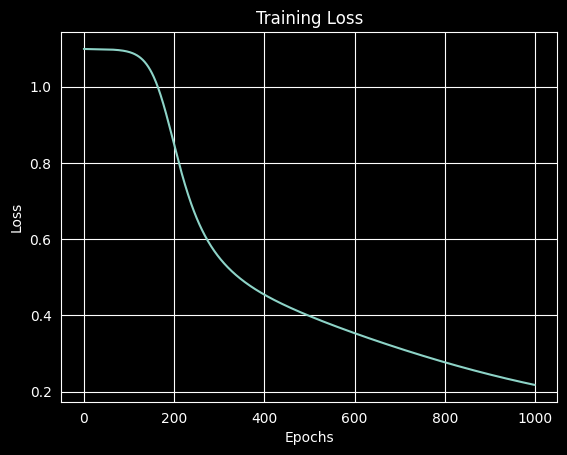

In [27]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


In [28]:
def accuracy(X, Y):
    _, _, _, A2 = forward_pass(X)
    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(Y, axis=1)
    return np.mean(predictions == labels)

# Calculate and print accuracies
train_acc = accuracy(X_train, y_train)
test_acc = accuracy(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9583
Test Accuracy: 0.9667


In [29]:
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("y shape:", y.shape)
print("y_train shape:", y_train.shape)


X shape: (150, 4)
X_train shape: (120, 4)
y shape: (150, 3)
y_train shape: (120, 3)
